<a href="https://colab.research.google.com/github/luongvantuit/learn-ai-with-python/blob/master/cnn/VD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import os
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import PIL
import PIL.Image
from tensorflow import keras
import tensorflow_datasets as tfds

In [3]:
# Trains a model to classify images of 3 classes: cat, dog, and panda
def gen_model():
# Defines & compiles the model
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(rate=0.15), #adding dropout regularization throughout the model to deal with overfitting
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.1),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.10),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 3 output neuron for the 3 classes of Animal Images
    tf.keras.layers.Dense(3, activation='softmax')
  ])
  from tensorflow.keras.optimizers import RMSprop
  model.compile(loss='categorical_crossentropy',
      optimizer="adam",
      metrics=['acc'])
  return model

In [18]:
# Trains a model to classify images of 3 classes: cat, dog, and panda
def train_test_animals():
  # Creates an instance of an ImageDataGenerator called train_datagen, and a train_generator, train_datagen.flow_from_directory
  from tensorflow.keras.preprocessing.image import ImageDataGenerator
  #splits data into training and testing(validation) sets
  train_datagen =ImageDataGenerator(rescale=1./255, validation_split=0.25)
  import matplotlib.pyplot as plt
  #training data
  train_generator = train_datagen.flow_from_directory("/content/drive/My Drive/Machine Learning/CNN/animal_image_dataset/animals/animals",
                                                      # Source directory
                                                      target_size=(150, 150), # Resizes images
                                                      batch_size=15,
                                                      class_mode='categorical',
                                                      subset = 'training')
  epochs = 2
  #Testing data
  validation_generator = train_datagen.flow_from_directory('/content/drive/My Drive/Machine Learning/CNN/animal_image_dataset/animals/animals',
                                                           target_size=(150, 150),
                                                           batch_size=15,
                                                           class_mode='categorical',
                                                           subset='validation') # set as validation data
  model = gen_model()
  # Model fitting for a number of epochs
  history = model.fit(
      train_generator,
      steps_per_epoch=150,
      epochs=epochs,
      validation_data = validation_generator,
      validation_steps = 50,
      verbose=1)
  print(history.history.keys())
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  #This code is used to plot the training and validation accuracy
  epochs_range = range(epochs)
  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')
  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()
  # returns accuracy of training
  print("Training Accuracy:"), print(history.history['acc'][-1])
  print("Testing Accuracy:"), print(history.history['val_acc'][-1])

Found 2263 images belonging to 3 classes.
Found 754 images belonging to 3 classes.
Epoch 1/2
150/150 [==============================] - 119s 781ms/step - loss: 0.8891 - acc: 0.5538 - val_loss: 0.7701 - val_acc: 0.5960
Epoch 2/2
150/150 [==============================] - 107s 714ms/step - loss: 0.6931 - acc: 0.6481 - val_loss: 0.7730 - val_acc: 0.6067
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


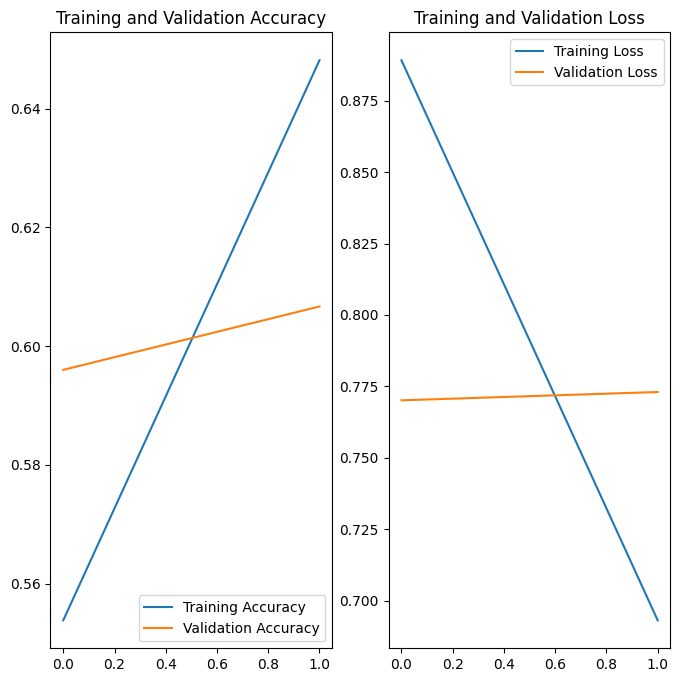

In [19]:
train_test_animals()